# TP à rendre 3 Gradient, filtrage et morphologie
Dans ce TP, nous aimerions appliquer une analyse d'image en efféctuant:
- un calcul basique de gradient horizontal et vertical,
- un calcul du module et de l'orientation du gradient,
- un calcul du gradient en utilisant une convolution avec les filtres Sobel et Prewitt,
- un calcul du Laplacien du Gaussien (dérivée seconde de l'image)
- un filtrage de l'image avec un filtre médian, gaussien et un filtre moyen et comparer la difference,
- un seuillage de l'image,
- des morphologies mathématiques (dilatation et érosion),
L'objectif est d'observer le résultat pour chaque opération et de comparer les differentes méthodes.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
from statistics import median

In [2]:
# préparation de l'image
image = np.zeros((8,8))
image[0,0]=0;image[0,1]=12;image[0,2]=53;image[0,3]=32;image[0,4]=190;image[0,5]=53;image[0,6]=174;image[0,7]=53;
image[1,0]=57;image[1,1]=32;image[1,2]=12;image[1,3]=227;image[1,4]=219;image[1,5]=202;image[1,6]=32;image[1,7]=154;
image[2,0]=65;image[2,1]=85;image[2,2]=93;image[2,3]=239;image[2,4]=251;image[2,5]=227;image[2,6]=65;image[2,7]=158;
image[3,0]=73;image[3,1]=146;image[3,2]=146;image[3,3]=247;image[3,4]=255;image[3,5]=235;image[3,6]=154;image[3,7]=130;
image[4,0]=97;image[4,1]=166;image[4,2]=117;image[4,3]=231;image[4,4]=243;image[4,5]=210;image[4,6]=117;image[4,7]=117;
image[5,0]=117;image[5,1]=190;image[5,2]=36;image[5,3]=146;image[5,4]=178;image[5,5]=93;image[5,6]=20;image[5,7]=170;
image[6,0]=130;image[6,1]=202;image[6,2]=73;image[6,3]=20;image[6,4]=12;image[6,5]=53;image[6,6]=85;image[6,7]=194;
image[7,0]=146;image[7,1]=206;image[7,2]=130;image[7,3]=117;image[7,4]=85;image[7,5]=166;image[7,6]=182;image[7,7]=215;
image

array([[  0.,  12.,  53.,  32., 190.,  53., 174.,  53.],
       [ 57.,  32.,  12., 227., 219., 202.,  32., 154.],
       [ 65.,  85.,  93., 239., 251., 227.,  65., 158.],
       [ 73., 146., 146., 247., 255., 235., 154., 130.],
       [ 97., 166., 117., 231., 243., 210., 117., 117.],
       [117., 190.,  36., 146., 178.,  93.,  20., 170.],
       [130., 202.,  73.,  20.,  12.,  53.,  85., 194.],
       [146., 206., 130., 117.,  85., 166., 182., 215.]])

In [3]:
#lecture de l'image
image =cv.imread('image1.png',0)
#décommenter au besoin

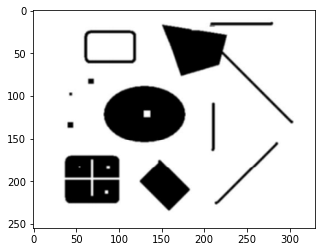

In [4]:
plt.imshow(image,cmap='gray')

# Calcul du gradient de l'image

Définir d'abord une fonction de convolution  
**Astuce**: pour ajouter du padding il est possible d'utiliser la fonction cv.copyMakeBorder

In [5]:
def removeSquarePadding(img):
    img = np.delete(img,img.shape[1]-1,1)
    img = np.delete(img,img.shape[0]-1,0)
    img = np.delete(img,0,0)
    img = np.delete(img,0,1)
    return(img)
def roofAndFloor(img):
    img[img>255]=255
    img[img<0]=0
    return (img)
def gradient(img,X):
    imag = np.copy(img)
    if(X):imag = np.vstack((imag,np.zeros((1,img.shape[1]))))
    else:imag = np.hstack((imag,np.zeros((img.shape[0],1))))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            imag[i][j]=imag[i+X][j+(not X)]-imag[i][j]
    imag = np.delete(imag,imag.shape[0+(not X)]-1,0+(not X))
    return imag.astype(int)
def convolution(image,filtre):
    if((filtre.shape==(1,2))and(filtre[0][0]==-1)and(filtre[0][1]==1)):
        return gradient(image,True)
    if((filtre.shape==(2,1))and(filtre[0][0]==-1)and(filtre[1][0]==1)):
        return gradient(image,False)
    if(filtre.shape!=(3,3)):
        return image
    imagC = cv.copyMakeBorder(image,1,1,1,1,cv.BORDER_CONSTANT)
    vals = imagC.copy()
    for i in range(1,vals.shape[0]-1):
        for j in range(1,vals.shape[1]-1):
            imagC[i][j] = (vals[i-1:i+2][:,j-1:j+2]*filtre).sum()
    return removeSquarePadding(imagC)

Gradient par rapport à x  

In [6]:
filtreX = np.array([[-1,1]])
gradX = convolution(image,filtreX)
gradX

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [-255, -255, -255, ..., -254, -255, -255]])

Gradient par rapport à y

In [7]:
filtreY = np.array([[-1],[1]])
gradY = convolution(image,filtreY)
(gradY==0).sum()

62214

Magnitude du Gradient $Mod(G(i,j)) = \sqrt{(G_x(i,j)^2+G_y(j,j)^2} $

In [8]:
def module(gradX,gradY):
    mag = np.copy(gradX).astype(float)
    for i in range(gradX.shape[0]):
        for j in range(gradX.shape[1]):
            mag[i][j]=math.sqrt(pow(gradX[i][j],2)+pow(gradY[i][j],2))
    return mag
modu = module(gradX,gradY)
modu

array([[  0.        ,   0.        ,   0.        , ...,   1.        ,
          0.        , 255.        ],
       [  0.        ,   0.        ,   0.        , ...,   1.        ,
          0.        , 255.        ],
       [  0.        ,   0.        ,   0.        , ...,   1.        ,
          0.        , 255.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   1.        ,
          0.        , 255.        ],
       [  0.        ,   0.        ,   0.        , ...,   1.        ,
          0.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 254.0019685 ,
        255.        , 360.62445841]])

Orientation du gradient $\theta = tan^{-1}\left( \frac{G_y(i,j) }{G_x(j,j)}\right) $  
**Astuce** Il est possible d'utiliser la fonction np.arctan2, mais elle retourne les valeurs en radians. Il est possible de les convertir en degrees soit manuellement, soit en utilisant math.degrees

In [9]:
def direction(gradX,gradY):
    ret = np.zeros(gradX.shape)
    ret[gradX!=0] = np.degrees(np.arctan(gradY[gradX!=0]/gradX[gradX!=0]))
    return ret
direction(gradX,gradY)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        , -0.        , ..., -0.22557277,
        -0.        , 45.        ]])

# Binarisation de l'image  
D'abord binariser l'image en fonction de la magnitude comme vu en TD (G(i,j)>70)  
Ensuite binariser en fonction du niveau de gris (I(x,y)>70)  
Observer la difference entre les deux résultats,   
Qu'obtient-on  de chaque binarisation?

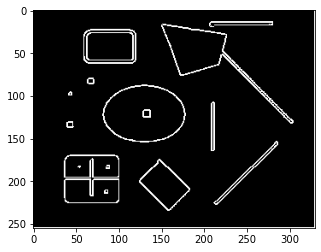

In [10]:
imageBin = np.copy(image)
imageBin[modu>70]=1
imageBin[modu<=70]=0
plt.imshow(imageBin,cmap="gray")

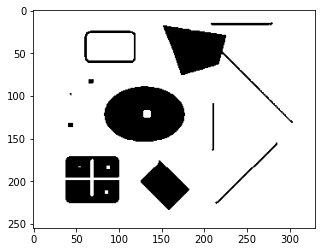

In [11]:
imageBin2 = np.copy(image)
imageBin2[image>70]=1
imageBin2[image<=70]=0
plt.imshow(imageBin2,cmap="gray")

### La première binarisation nous montre en blanc le pixels ou il y a eu le plus de changement avec le pixel de bas et a droite tandis que la seconde ne fait que rendre les pixels claires blancs et les foncés noirs.

# Dilatation avec un élement structurant de type diamond

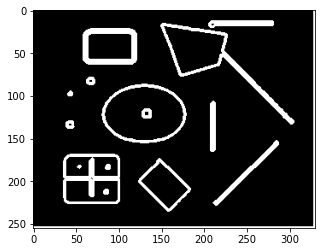

In [12]:
def dilatationDiamant(imgBin):
    imgDil = cv.copyMakeBorder(imgBin,1,1,1,1,cv.BORDER_CONSTANT)
    imgDilC = np.copy(imgDil)
    for i in range(1,imgDil.shape[0]-1):
        for j in range(1,imgDil.shape[1]-1):
            imgDilC[i][j] = imgDil[i][j] or imgDil[i+1][j] or imgDil[i-1][j] or imgDil[i][j+1] or imgDil[i][j-1]
    return (removeSquarePadding(imgDilC))
D2 = dilatationDiamant(imageBin)
plt.imshow(D2,cmap="gray")

comparer avec opencv

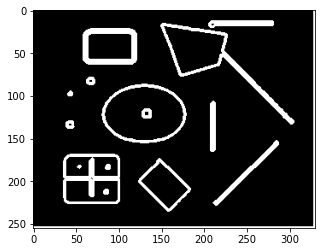

In [13]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
imageDI = cv.dilate(imageBin, kernel, iterations=1)
#imagzER = cv.erode(imageBin, kernel, iterations=1)
plt.imshow(imageDI,cmap="gray")

# Erosion avec un élément structurant de type carré 

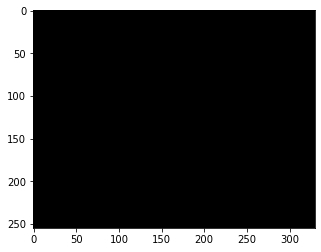

In [14]:
def erosionCarré(imgBin):
    imgCor = cv.copyMakeBorder(imgBin,1,1,1,1,cv.BORDER_CONSTANT,value=1)
    imgCorC = np.copy(imgCor)
    for i in range(1,imgCor.shape[0]-1):
        for j in range(1,imgCor.shape[1]-1):
            imgCorC[i][j] = imgCor[i-1:i+2][:,j-1:j+2].sum()/9
    return (removeSquarePadding(imgCorC).astype(int))
agape = erosionCarré(imageBin)
plt.imshow(agape,cmap='gray')

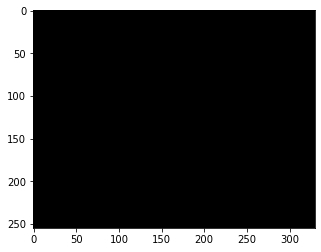

In [15]:
kernel = np.ones((3,3),np.uint8)
imageER = cv.erode(imageBin, kernel, iterations=1)
plt.imshow(imageER,cmap="gray")

# Dérivé avec filtres Prewitt et Sobel

D'abord définir les filtres

In [16]:
#Prewitt
c=1
# commenter et décommenter c au besoin
filtreP_x = np.array([[-1,0,1],[-c,0,c],[1,0,1]])
filtreP_y = np.array([[-1,-c,-1],[0,0,0],[1,c,1]])
#Sobel
c=2
filtreS_x = np.array([[-1,0,1],[-c,0,c],[1,0,1]])
filtreS_y = np.array([[-1,-c,-1],[0,0,0],[1,c,1]])

Ensuite appliquer le filtre avec une convolution pour calculer la dérivé avec filtre Prewitt

dérivé par rapport à x

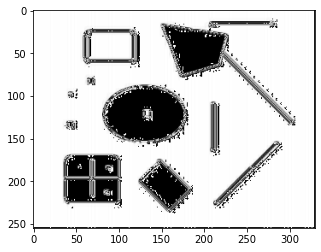

In [17]:
preX = convolution(image,filtreP_x)
plt.imshow(roofAndFloor(preX),cmap="gray")

dérivé par rapport à y

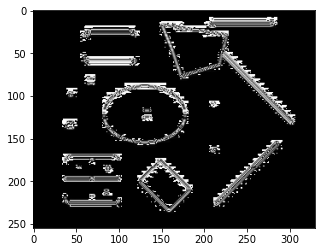

In [18]:
preY = convolution(image,filtreP_y)
plt.imshow(roofAndFloor(preY),cmap="gray")

Et appliquer le filtre avec une convolution pour calculer la dérivé avec filtre Sobel

dérivé par rapport à x

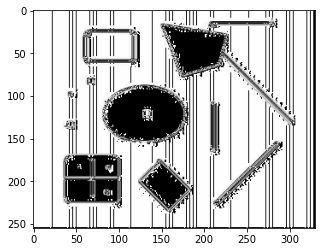

In [19]:
sobX = convolution(image,filtreS_x)
plt.imshow(roofAndFloor(sobX),cmap="gray")

dérivé par rapport à y

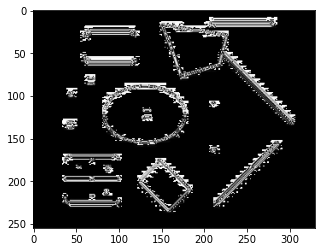

In [20]:
sobY = convolution(image,filtreS_y)
plt.imshow(roofAndFloor(sobY),cmap="gray")

# Comparer vos résultats avec opencv

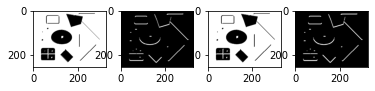

In [21]:
Gx_Prewitt_cv=cv.filter2D(image,-1,kernel=filtreP_x)
Gy_Prewitt_cv=cv.filter2D(image,-1,kernel=filtreP_y)
Gx_Sobel_cv=cv.filter2D(image,-1,kernel=filtreS_x)
Gy_Sobel_cv=cv.filter2D(image,-1,kernel=filtreS_y)
plt.subplot(141)
plt.imshow(Gx_Prewitt_cv,cmap='gray')
plt.subplot(142)
plt.imshow(Gy_Prewitt_cv,cmap='gray')
plt.subplot(143)
plt.imshow(Gx_Sobel_cv,cmap='gray')
plt.subplot(144)
plt.imshow(Gy_Sobel_cv,cmap='gray')

In [22]:
print((preX!=Gx_Prewitt_cv).sum())
print((preY!=Gy_Prewitt_cv).sum())
print((sobX!=Gx_Sobel_cv).sum())
print((sobY!=Gy_Sobel_cv).sum())

65681
9425
71645
9837


# Deuxième dérivé de l'image
Convolution avec l'opérateur Laplacien

In [23]:
filtre_Lap = np.array([[0,1,0],[1,-4,1],[0,1,0]])

Appliquer la convolution 

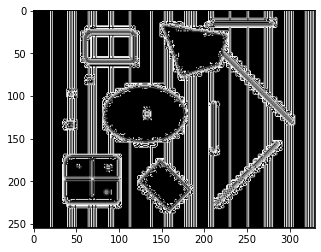

In [24]:
Lap = convolution(image,filtre_Lap)
plt.imshow(roofAndFloor(Lap),cmap="gray")

comparer avec opencv

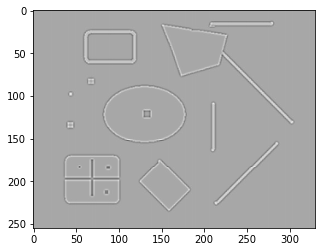

In [25]:
Lap_Cv2 = cv.Laplacian(image,cv.CV_64F)
plt.imshow(Lap_Cv2,cmap="gray")

Filtre Moyen

In [26]:
filtre_Moy = np.ones((3,3))/9

Appliquer la convolution

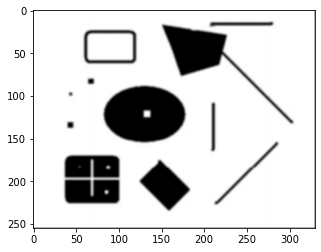

In [27]:
imMoy = convolution(image,filtre_Moy)
plt.imshow(imMoy,cmap="gray")

comparer avec opencv

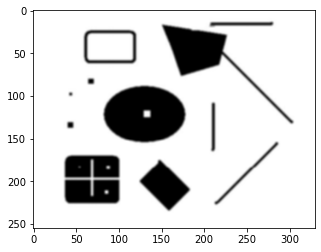

In [28]:
# taille de fenetre F
F=3
filtreMoy = np.ones((F,F),np.float32)/(F*F)
imageMoy=cv.filter2D(image,-1,filtreMoy)
# ou bien utiliser la fonction cv.blur
#imageMoy = cv.blur(image,(F,F))
plt.imshow(imageMoy,cmap="gray")

Filtre Gaussien

In [29]:
sigma=1
F=3
FG = np.ones((F,F))
m = int(F/2)
for i in range(-m,m+1):
    for j in range(-m,m+1):
        FG[i+m][j+m] = math.exp(-((i)*(i)+(j)*(j))/(2*sigma*sigma))/(2*math.pi*sigma*sigma)
FG

array([[0.05854983, 0.09653235, 0.05854983],
       [0.09653235, 0.15915494, 0.09653235],
       [0.05854983, 0.09653235, 0.05854983]])

appliquer la convolution en utilisant le filtre créé

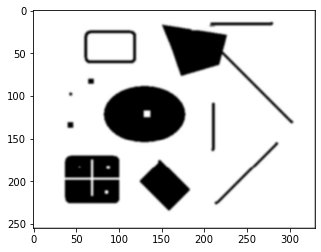

In [30]:
imagGauss = convolution(image,FG)
plt.imshow(imagGauss,cmap="gray")

Appliquer la convolution et comparer avec opencv

75116


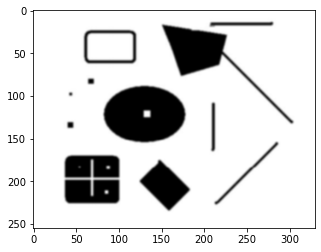

In [31]:
imageG= cv.GaussianBlur(image,(F,F),sigma,borderType=cv.BORDER_DEFAULT)
plt.imshow(imageG,cmap="gray")
print((imageG==cv.GaussianBlur(image,(F,F),sigma*2,sigma,borderType=cv.BORDER_DEFAULT)).sum())

Filtre médian

C:\Users\GM_GMI\anaconda3\lib\statistics.py:435: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i])/2


70904


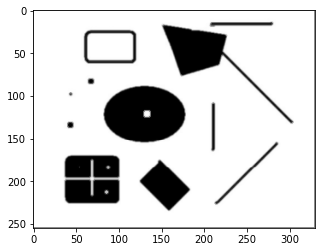

In [32]:
def médian(image):
    imagC = image.copy()
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            imagC[i][j] = median(np.ravel(image[i-1:i+2][:,j-1:j+2]))
    col = image.shape[1];lin = image.shape[0]
    imagC[0][0] = round(median(np.ravel(image[0:2][:,0:2])))                     #Les coins
    imagC[0][col-1] = round(median(np.ravel(image[0:2][:,col-2:col])))
    imagC[lin-1][0] = round(median(np.ravel(image[lin-2:lin][:,0:2])))
    imagC[lin-1][col-1] = round(median(np.ravel(image[lin-2:lin][:,col-2:col])))
    for i in range(1,lin-1):                                                     #la premiere et derniere colonne
        imagC[i][0] = round(median(np.ravel(image[i-1:i+2][:,0:2])))
        imagC[i][col-1] = round(median(np.ravel(image[i-1:i+2][:,col-2:col])))
    for j in range(1,col-1):                                                     #la premiere et derniere ligne
        imagC[0][j] = round(median(np.ravel(image[0:2][:,j-1:j+2])))
        imagC[lin-1][j] = round(median(np.ravel(image[lin-2:lin][:,j-1:j+2])))
    return imagC
med = médian(image)
plt.imshow(med,cmap="gray")
print((med==image).sum())

Comparer avec opencv

In [35]:
imageMed = image.copy()
cv.medianBlur(image,dst=imageMed,ksize=2)
imageMed

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\median_blur.dispatch.cpp:285: error: (-215:Assertion failed) (ksize % 2 == 1) && (_src0.dims() <= 2 ) in function 'cv::medianBlur'


# Tester avec les autres images

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 28 novembre 2021 à 23:00


In [ ]:
# bonne chance